In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Data Cleaning

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
# Outlier Removal

column = df.columns[1:-1]

Q3 = df[column].quantile(0.75)
Q1 = df[column].quantile(0.25)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

columns = df.columns[1:-1]

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))


In [12]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# Data Visualisation

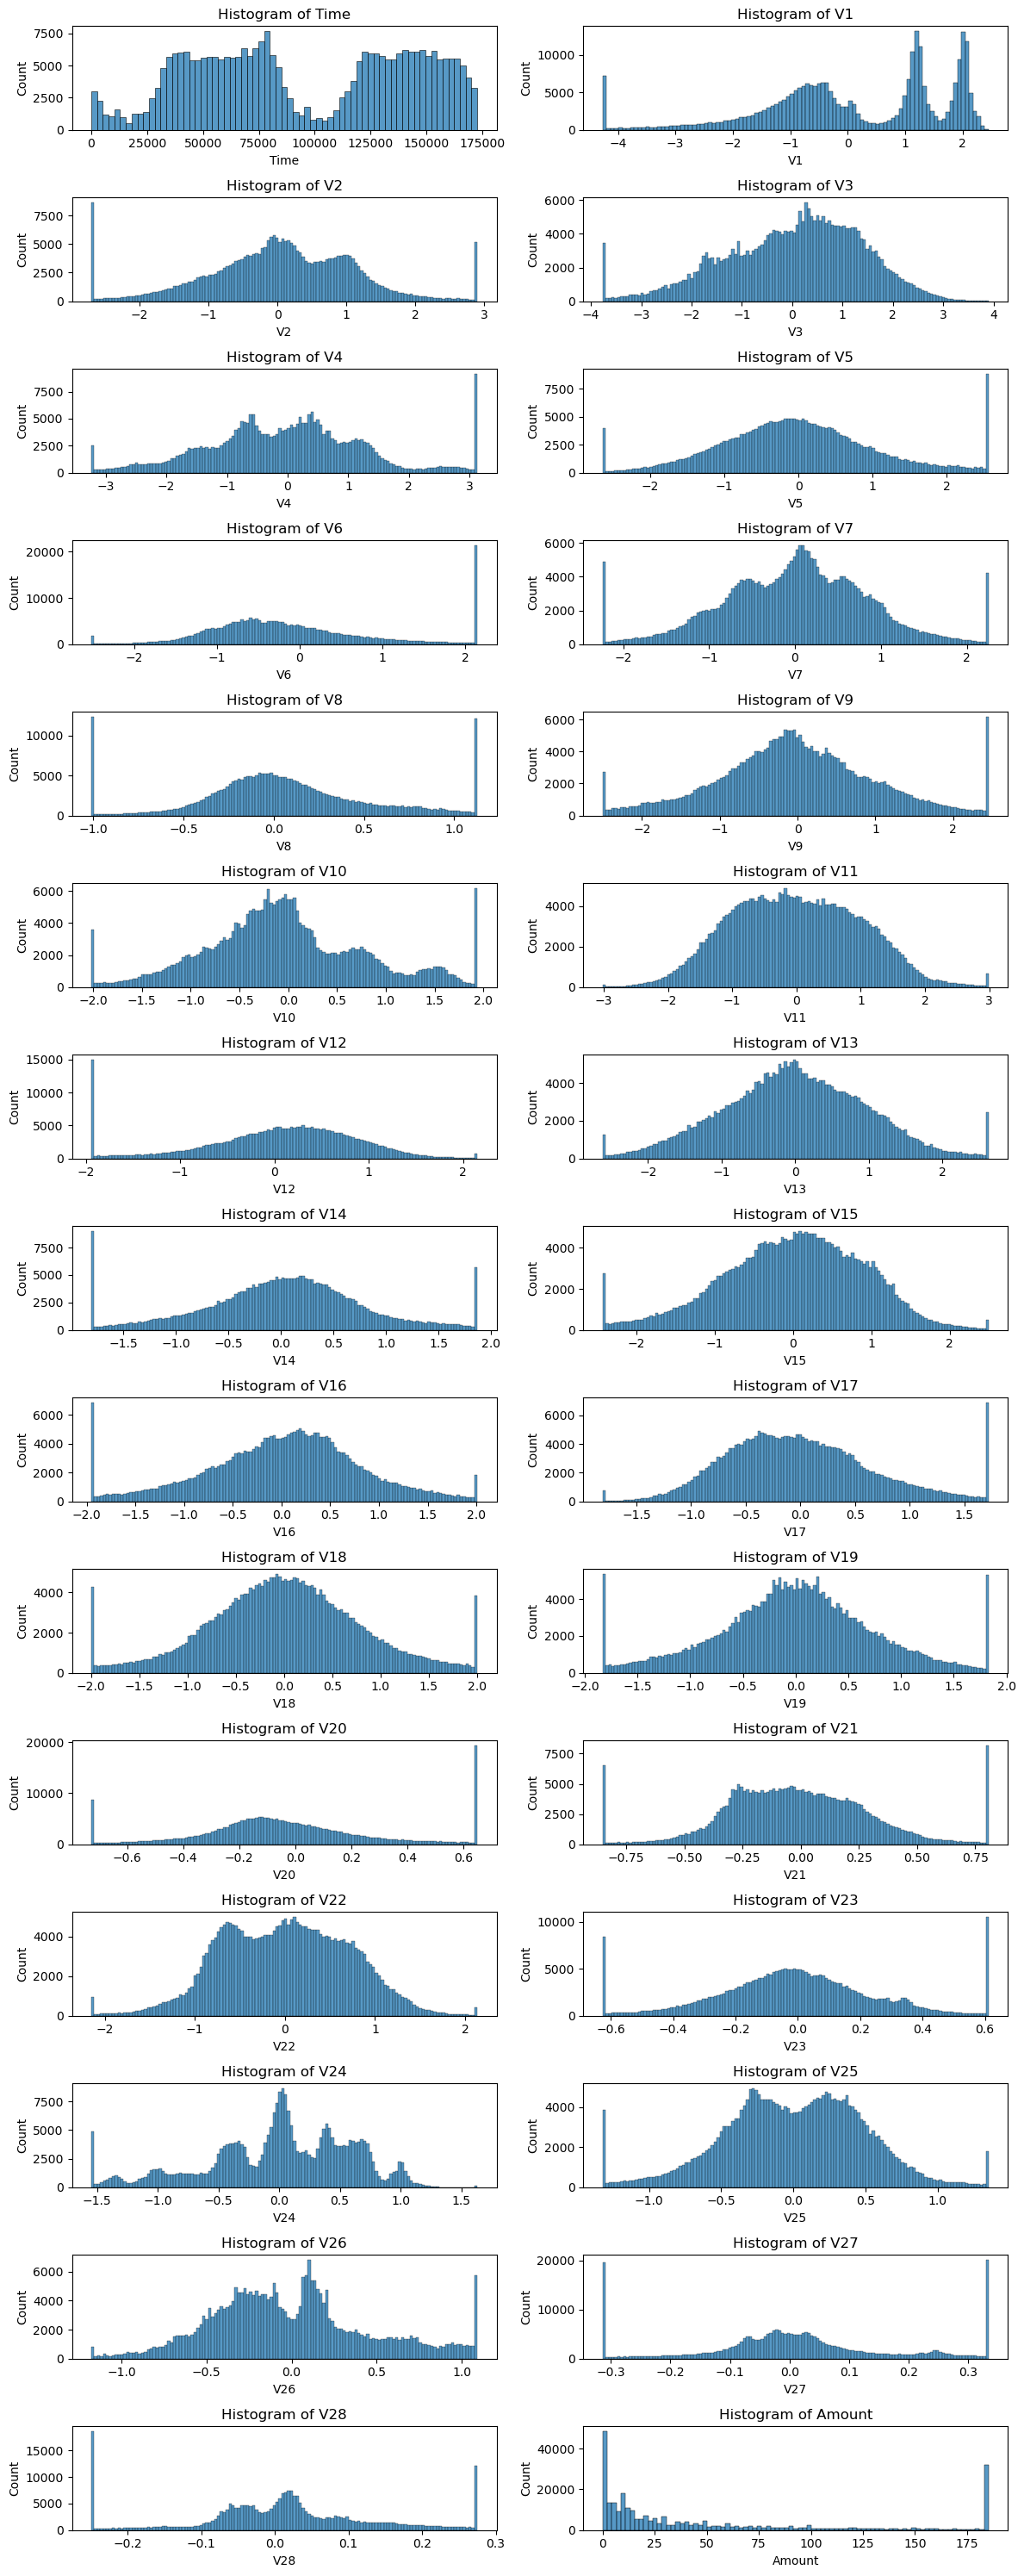

In [13]:
# Distribution

def plot_histplots_subplots(df):
    num_rows = 15
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))

    for i, column in enumerate(df.columns[:-1]):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        sns.histplot(df[column], ax=ax)
        ax.set_title(f"Histogram of {column}")

    plt.tight_layout()
    plt.show()

plot_histplots_subplots(df)

# Multicollinearity Check

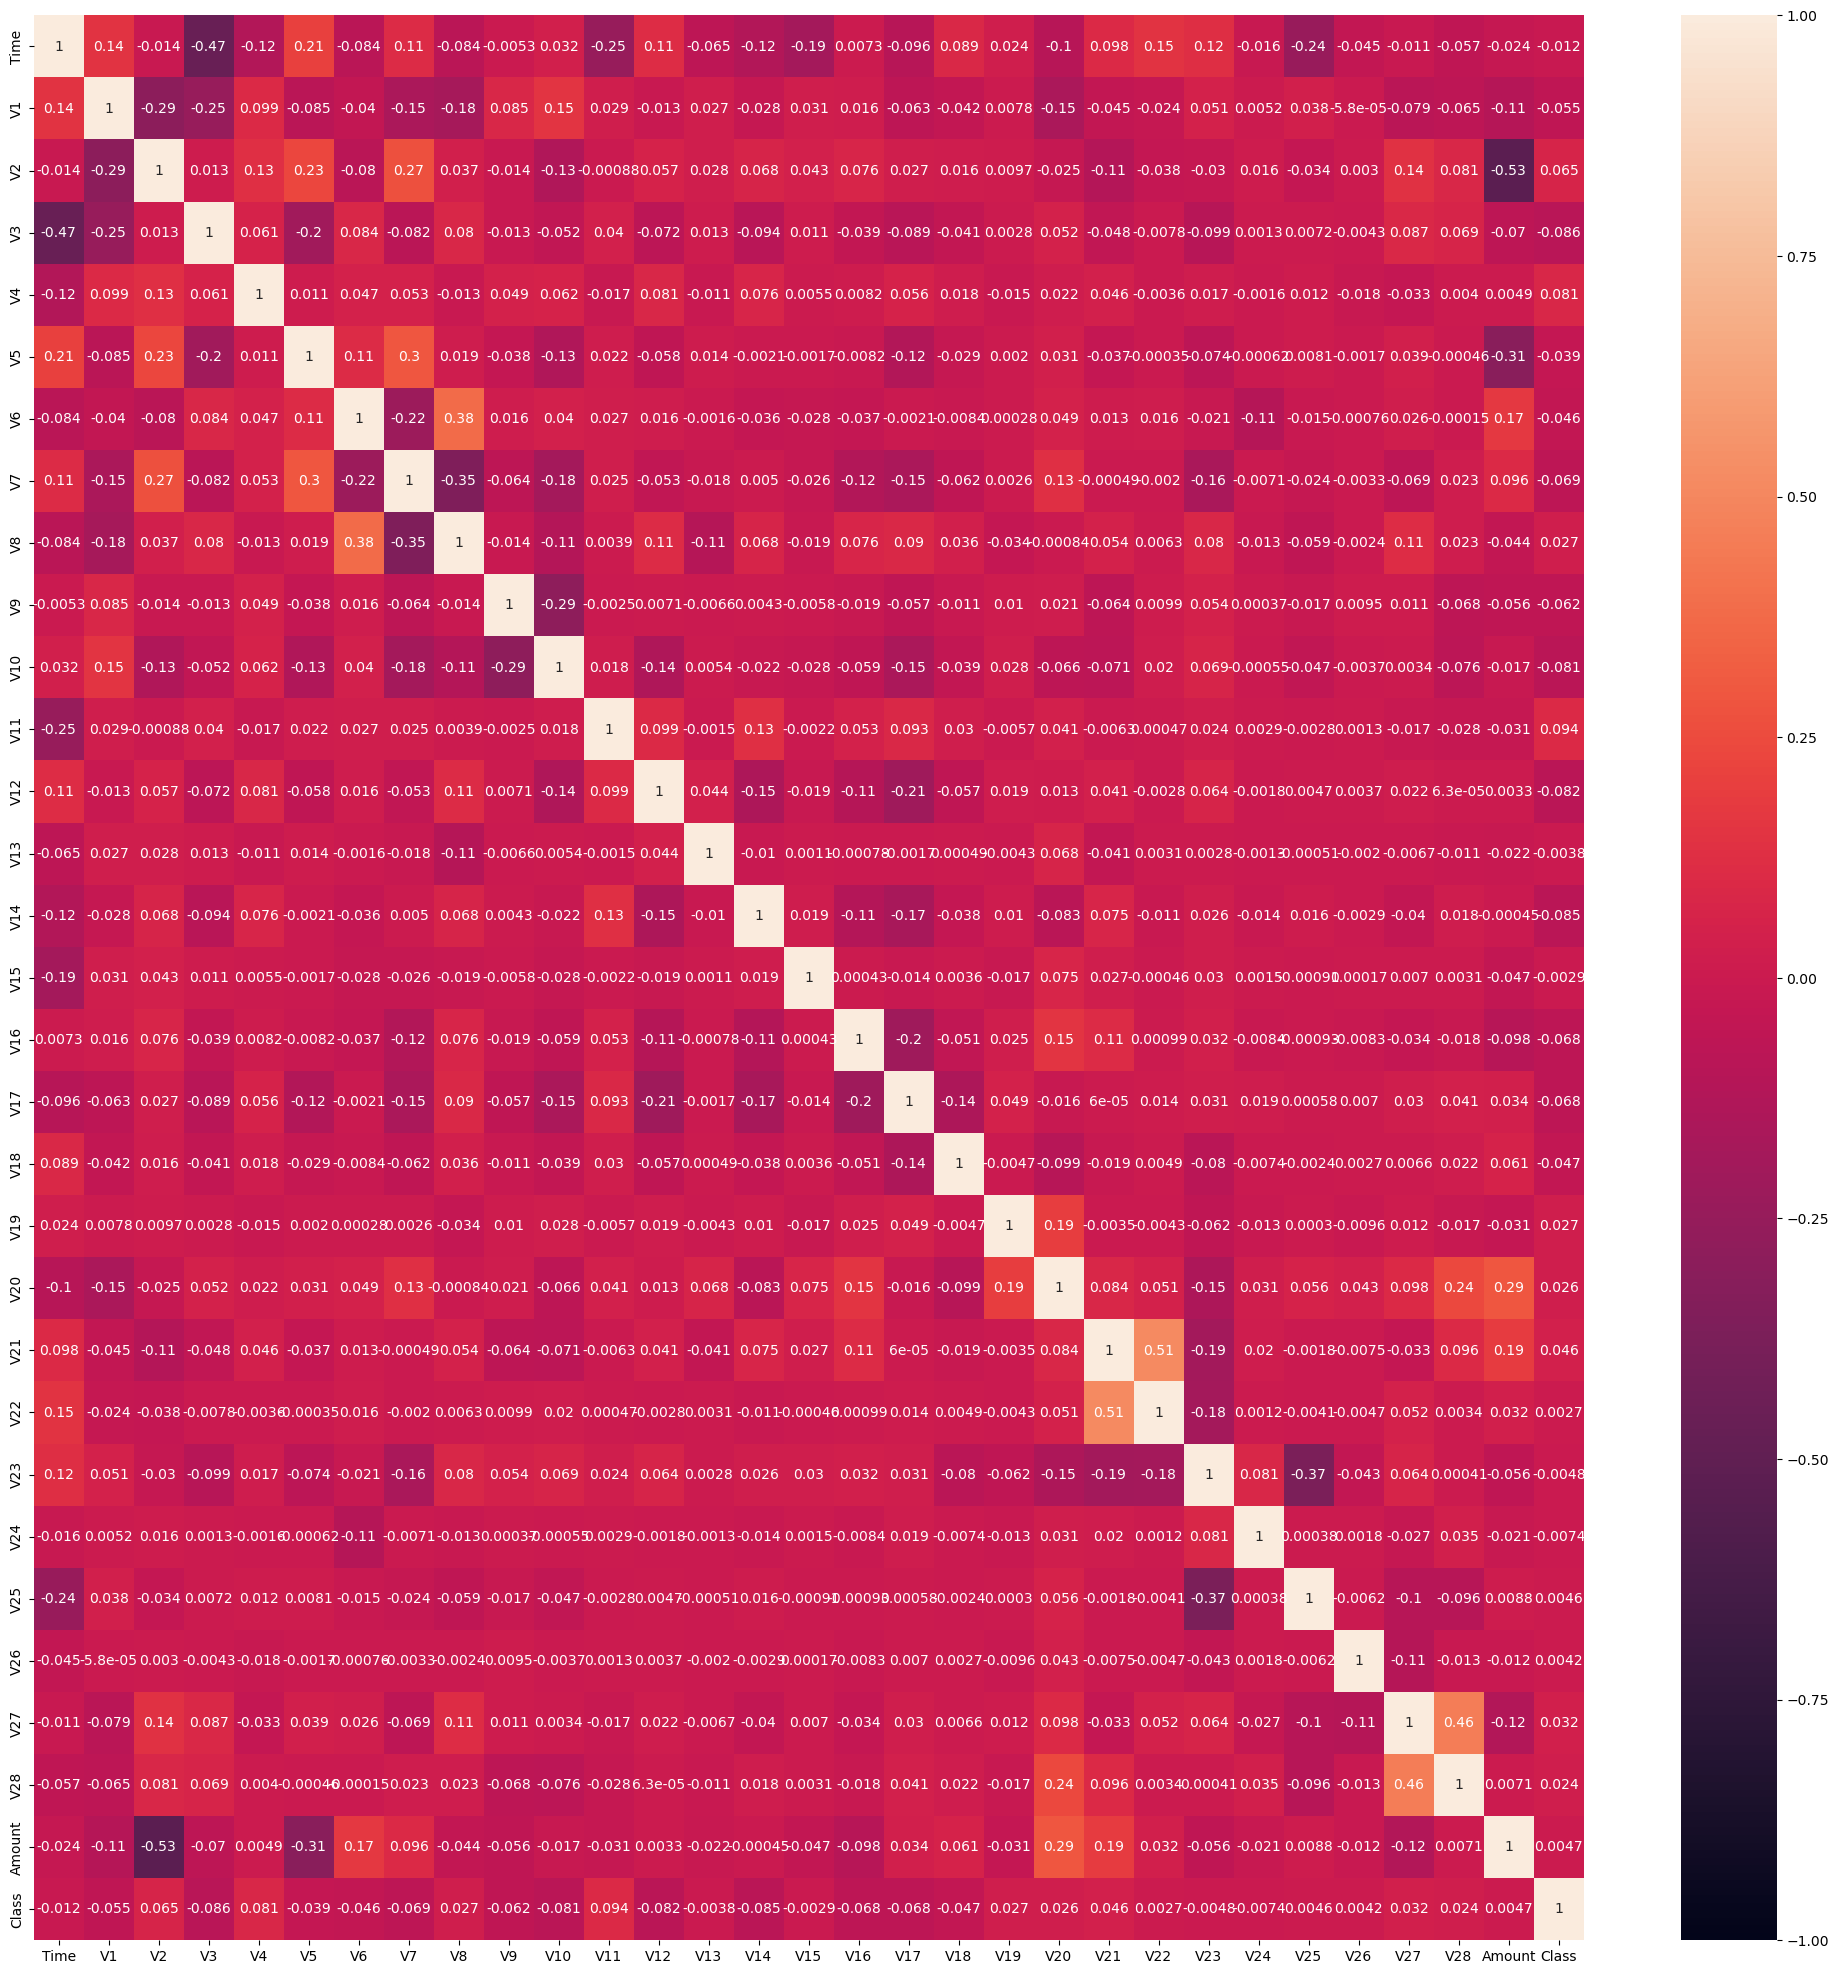

In [14]:
plt.figure(figsize = (25,25));
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1);

As none of the columns have correlation over .75, our data doesn't have significant level of multicollinearity. Hence we can go ahead with further analysis.

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns = df.columns

for i in columns:
    df[i] = encoder.fit_transform(df[i])

Note: Although all values were numerical, we needed to use label encoder because without encoder y_train below was giving 2-dimensional array while we can only use 1-dimensional array in below codes. 

# Train Test Split

In [16]:
x = df.drop(['Class'], axis = 1)
y = df['Class']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

# ML Models

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [19]:
lr_model = lr.fit(x_train, y_train)
y_predlr = lr_model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


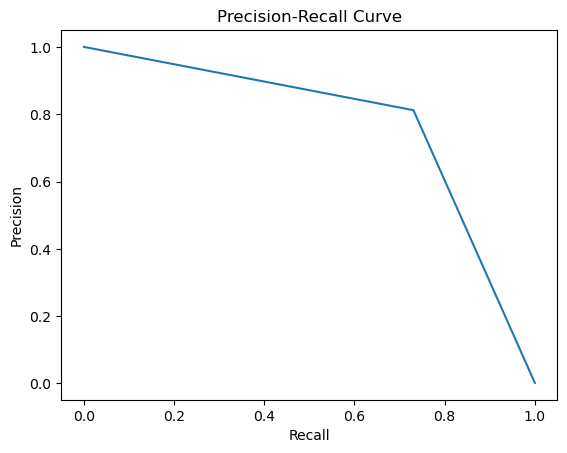

AUPRC =  0.7715731183035396


In [20]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_predlr)
auprc = auc(recall, precision)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)


### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt_model = dt.fit(x_train, y_train)
y_preddt = dt_model.predict(x_test)

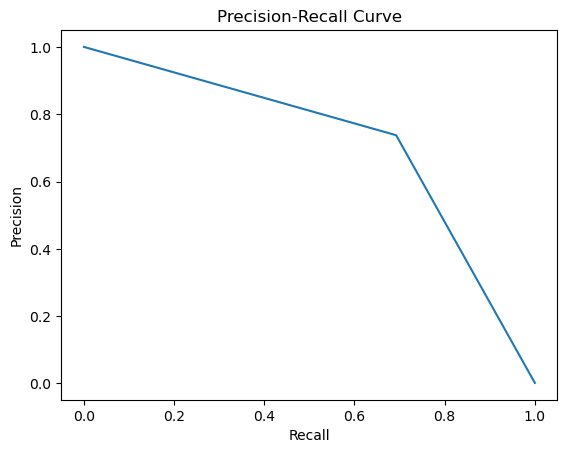

AUPRC =  0.7152412730971177


In [22]:
precision, recall, thresolds = precision_recall_curve(y_test, y_preddt)
auprc = auc(recall, precision)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_model = rf.fit(x_train, y_train)
y_predrf = rf_model.predict(x_test)

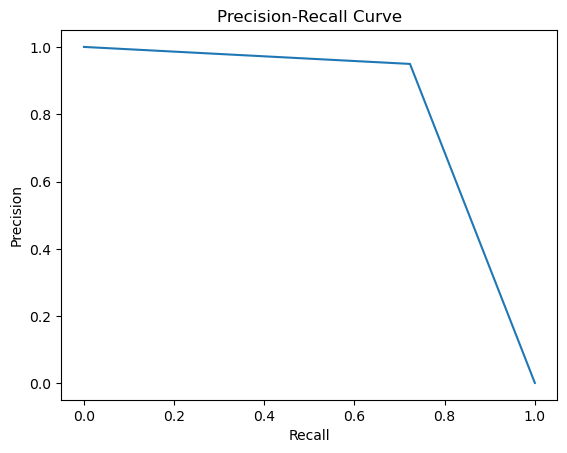

AUPRC =  0.8349701158954196


In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predrf)
auprc = auc(precision, recall)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)

Since AUPRC is best when Random Forest Classifier is used, we will use rf_model for our analysis.

# Scaling our Data

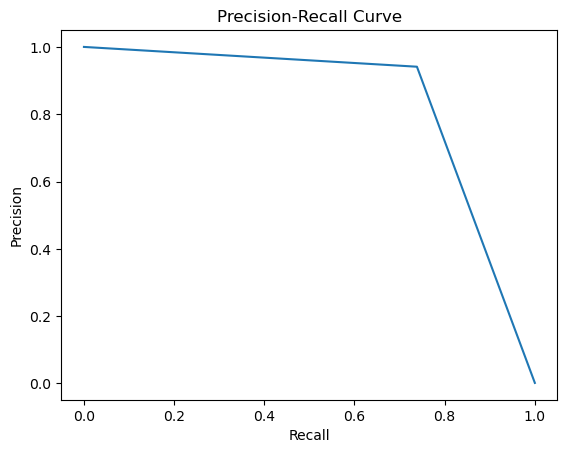

AUPRC =  0.8384914357380263


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scaling and fitting
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
rf = RandomForestClassifier()
rf_model = rf.fit(x_train2, y_train)
y_predrf1 = rf_model.predict(x_test2)

# Calculating AUPRC
precision, recall, thresolds = precision_recall_curve(y_test, y_predrf1)
auprc = auc(precision, recall)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)

# Conclusion

The credit card fraud detection model built using a Random Forest Classifier achieved an AUPRC of 0.83. This indicates that the model performs well in identifying fraudulent transactions while maintaining a low false positive rate. AUPRC was the most suitable evaluation metric for our project, as it considers the precision-recall trade-off and is robust against class imbalance. In the future, this model can be utilized to efficiently detect credit card fraud, potentially saving financial institutions and customers from fraudulent activities.